In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.patches as patches

from matplotlib.patches import Rectangle

#from PIL import Image

from scipy import ndimage
import copy

In [83]:
bin_size = 500

img_mp = np.ndarray([bin_size], dtype=np.ndarray)
img_ob = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

In [84]:
for i in range(bin_size):
    img_mp[i] = np.random.randint(0,10,size=20**2).reshape(20,20)
    img_ob[i] = copy.deepcopy(img_mp[i])
    img_ob[i][5:-5, 5:-5] = 0
    img_sum[i] = np.sum(img_ob[i])
    img_int[i] = np.sum(img_mp[i])
    
bucket_avg = np.mean(img_sum)
int_avg = np.mean(img_int)

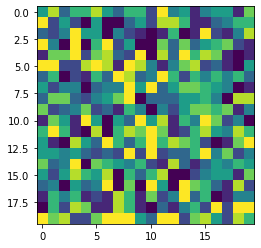

In [85]:
plt.imshow(img_mp[0])

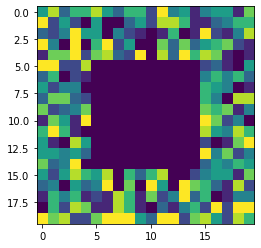

In [86]:
plt.imshow(img_ob[0])

In [87]:
ghost = np.zeros([20,20])

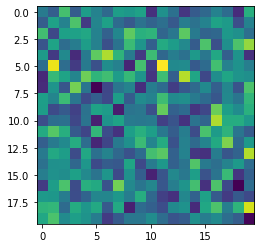

In [88]:
# Default second order GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin])*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size  
        
plt.imshow(ghost)

In [89]:
print(bucket_avg)

1353.278


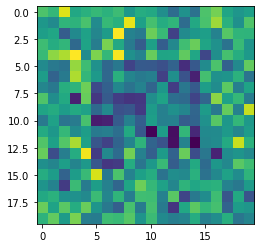

In [90]:
for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg)*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

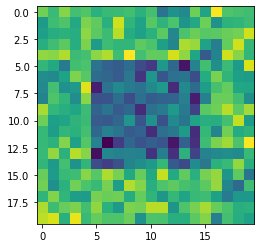

In [91]:
# Differential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg*img_int[bin]/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

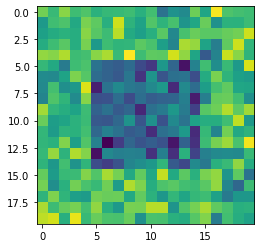

In [92]:
# Normalized GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin]/img_int[bin] - bucket_avg/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

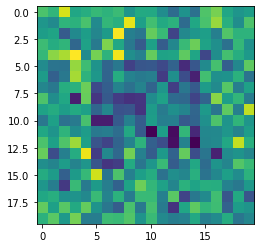

In [93]:
# Logarithmic GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += np.log(img_sum[bin]/bucket_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

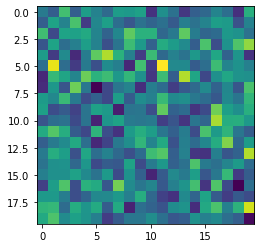

In [94]:
# Exponential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += 10**(img_sum[bin]/img_int[bin])*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)